In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl


In [ ]:
data =pd.read_csv('insurance.csv')
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Examine the distribution of Bmi (Body Mass Index)

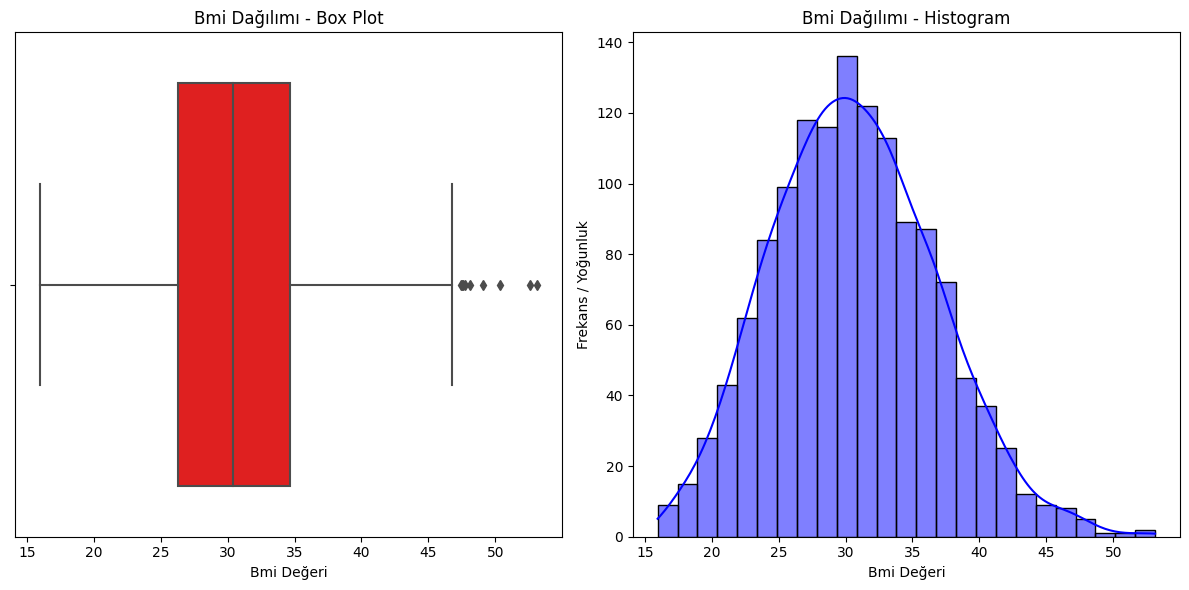

In [ ]:
bmi_data = data['bmi']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Box plot
sns.boxplot(x=bmi_data, ax=ax1, color='red')
ax1.set_title('Bmi Dağılımı - Box Plot')
ax1.set_xlabel('Bmi Değeri')

# Histogram
sns.histplot(bmi_data, ax=ax2, kde=True, color='blue')
ax2.set_title('Bmi Dağılımı - Histogram')
ax2.set_xlabel('Bmi Değeri')
ax2.set_ylabel('Frekans / Yoğunluk')


plt.tight_layout()
plt.show()

 Examine the relationship between “smoker” and “charges”

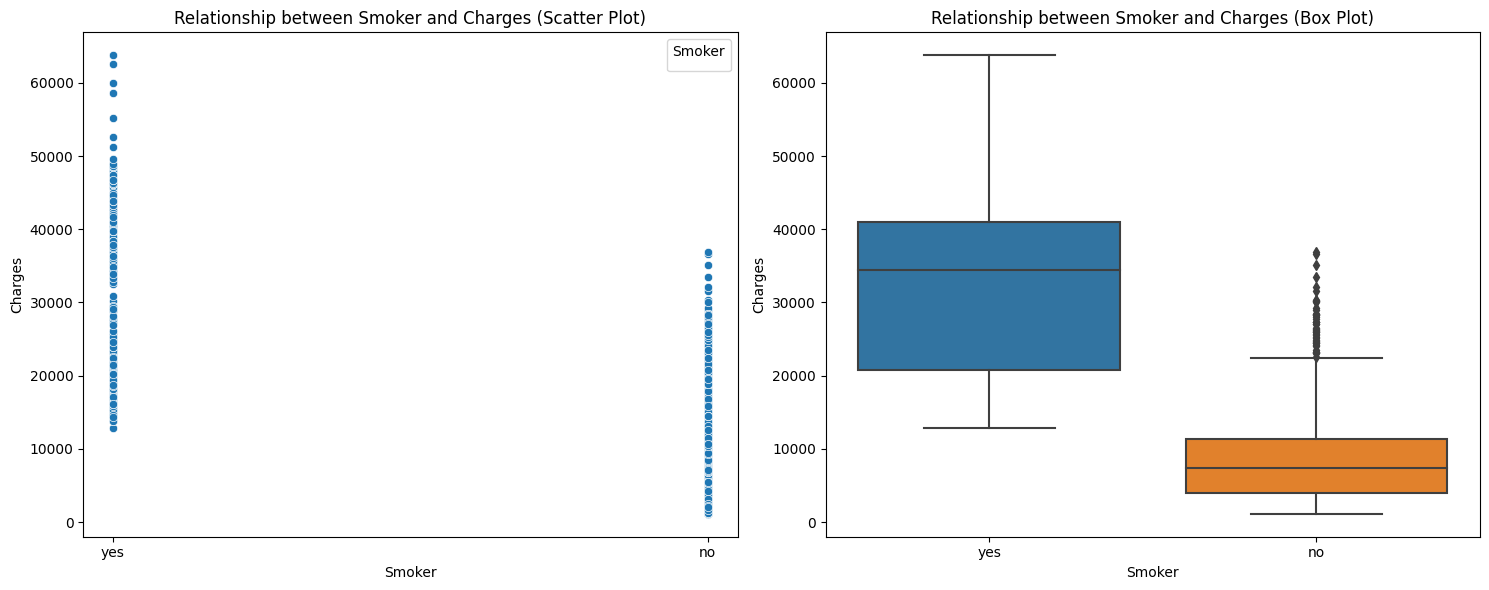

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot
sns.scatterplot(data=data, x='smoker', y='charges', ax=axes[0])
axes[0].set_title('Relationship between Smoker and Charges (Scatter Plot)')
axes[0].set_xlabel('Smoker')
axes[0].set_ylabel('Charges')
axes[0].legend(title='Smoker', loc='upper right')

# Box plot
sns.boxplot(data=data, x='smoker', y='charges', ax=axes[1])
axes[1].set_title('Relationship between Smoker and Charges (Box Plot)')
axes[1].set_xlabel('Smoker')
axes[1].set_ylabel('Charges')

plt.tight_layout()
plt.show()

Examine the relationship between “smoker” and “region”.

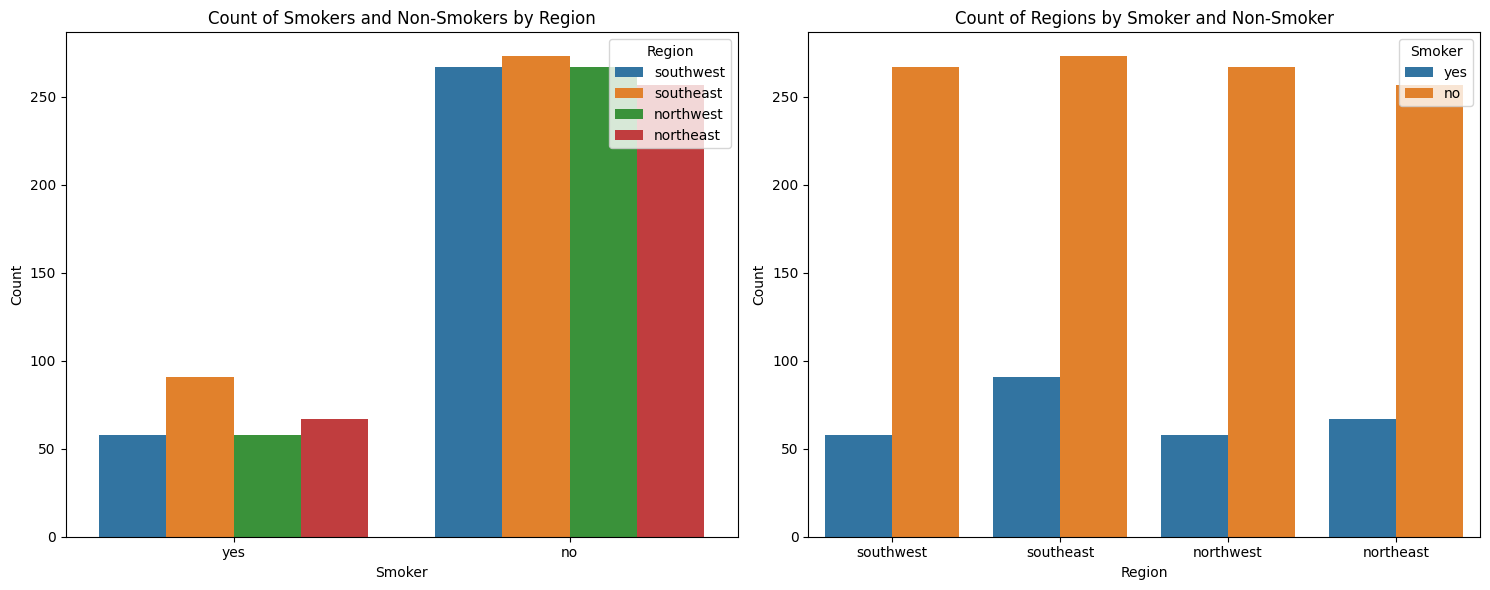

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Countplot smoker vs. region
sns.countplot(data=data, x='smoker', hue='region', ax=axes[0])
axes[0].set_title('Count of Smokers and Non-Smokers by Region')
axes[0].set_xlabel('Smoker')
axes[0].set_ylabel('Count')
axes[0].legend(title='Region', loc='upper right')

# Countplot region vs. smoker
sns.countplot(data=data, x='region', hue='smoker', ax=axes[1])
axes[1].set_title('Count of Regions by Smoker and Non-Smoker')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Count')
axes[1].legend(title='Smoker', loc='upper right')

plt.tight_layout()
plt.show()


 Examine the relationship between “bmi” and “sex”.


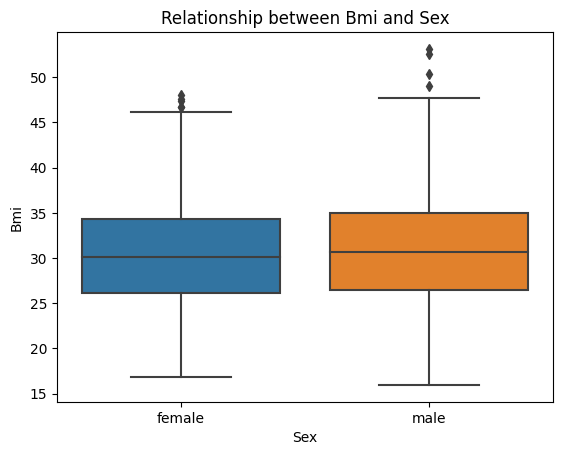

In [ ]:
# Box plot
sns.boxplot(data=data, x='sex', y='bmi')
plt.title('Relationship between Bmi and Sex')
plt.xlabel('Sex')
plt.ylabel('Bmi')
plt.show()

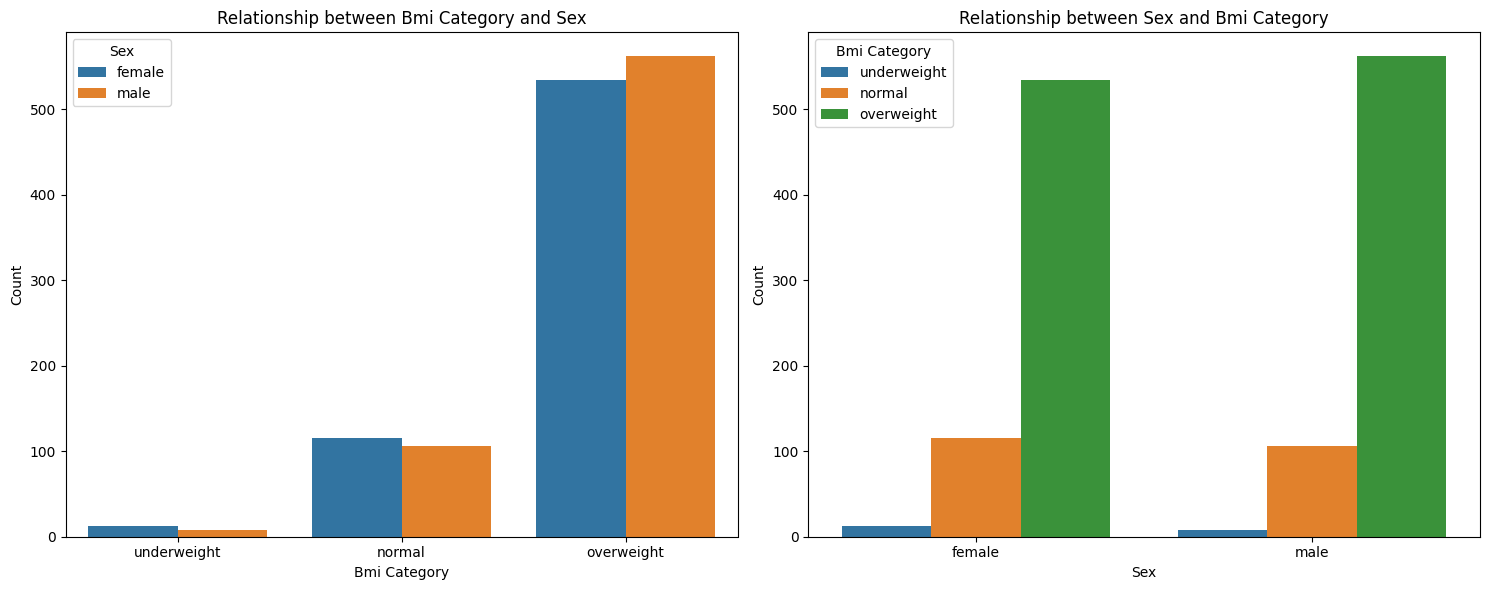

In [ ]:
# Categorize BMI values into categories (e.g.'underweight', 'normal', 'overweight').
data['bmi_category'] = pd.cut(data['bmi'], bins=[0, 18.5, 24.9, 100], labels=['underweight', 'normal', 'overweight'])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Countplot bmi_category by sex
sns.countplot(data=data, x='bmi_category', hue='sex', ax=axes[0])
axes[0].set_title('Relationship between Bmi Category and Sex')
axes[0].set_xlabel('Bmi Category')
axes[0].set_ylabel('Count')
axes[0].legend(title='Sex', loc='upper left')

# Countplot sex by bmi_category
sns.countplot(data=data, x='sex', hue='bmi_category', ax=axes[1])
axes[1].set_title('Relationship between Sex and Bmi Category')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Count')
axes[1].legend(title='Bmi Category', loc='upper left')

plt.tight_layout()
plt.show()

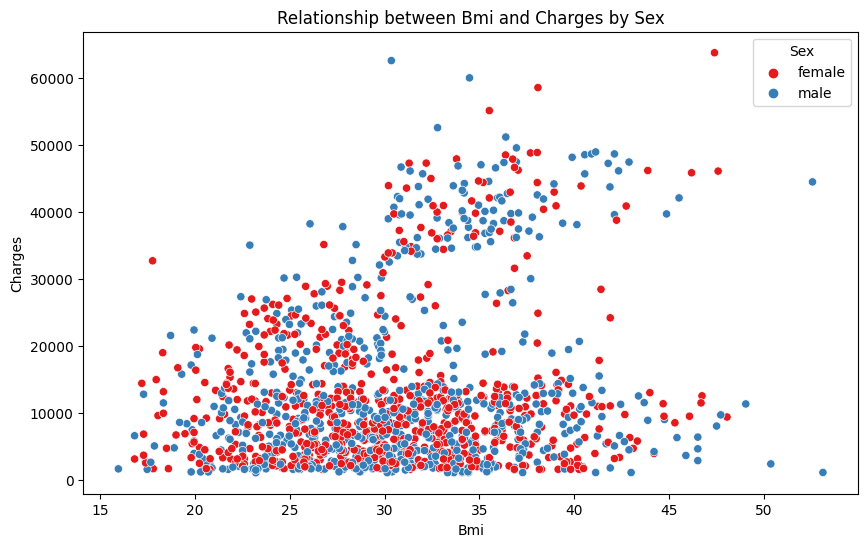

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bmi', y='charges', hue='sex', palette='Set1')
plt.title('Relationship between Bmi and Charges by Sex')
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.legend(title='Sex', loc='upper right')
plt.show()

 Find the "region" with the most "children"

In [ ]:
# "Sum the number of children by grouping the 'region' and 'children' columns.
region_children_sum = data.groupby('region')['children'].sum()

# Find the region with the highest number of children
most_children_region = region_children_sum.idxmax()

print("Region with the most children:", most_children_region)

Region with the most children: southeast


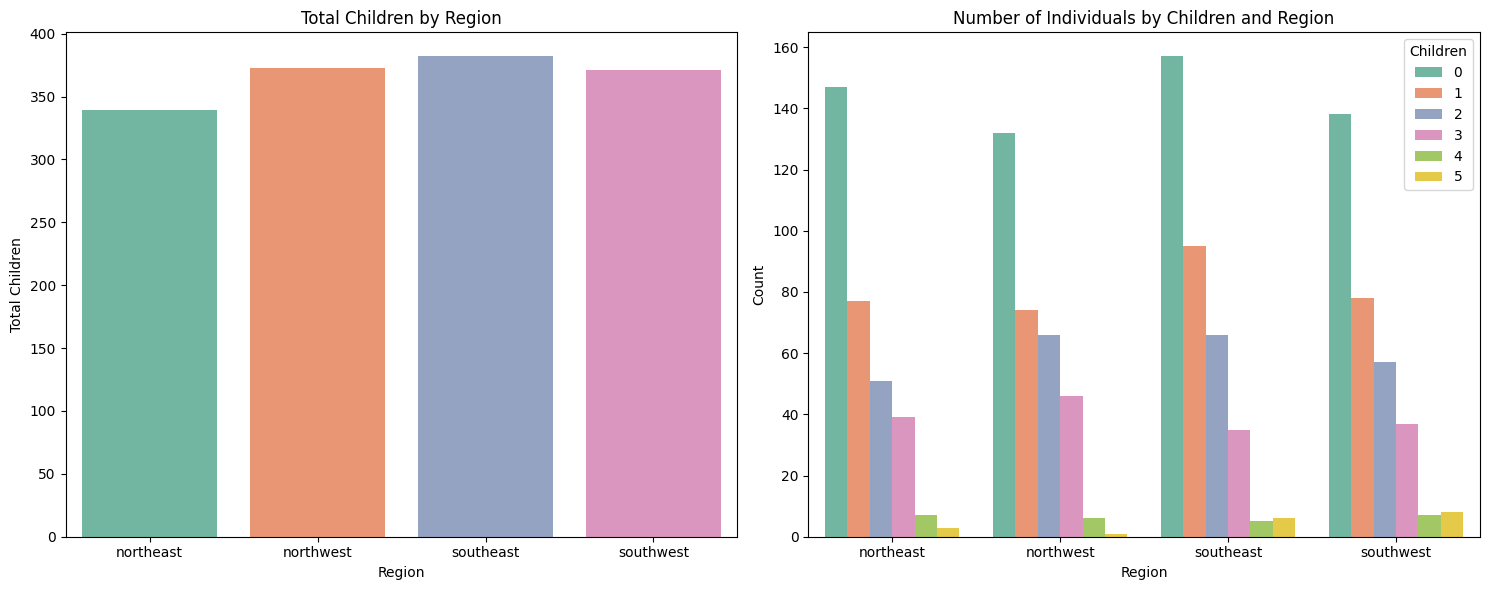

In [ ]:
# "Order the unique values of the 'region' column."
regions_order = sorted(data['region'].unique())

# "Sum the number of children by grouping the 'region' and 'children' columns.
region_children_sum = data.groupby('region')['children'].sum().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Total number of children bar plot
sns.barplot(data=region_children_sum, x='region', y='children', palette='Set2', ax=axes[0], order=regions_order)
axes[0].set_title('Total Children by Region')
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Total Children')

# Countplot
sns.countplot(data=data, x='region', hue='children', palette='Set2', ax=axes[1], order=regions_order)
axes[1].set_title('Number of Individuals by Children and Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Count')
axes[1].legend(title='Children', loc='upper right')

plt.tight_layout()
plt.show()

Examine the relationship between “age” and “bmi”

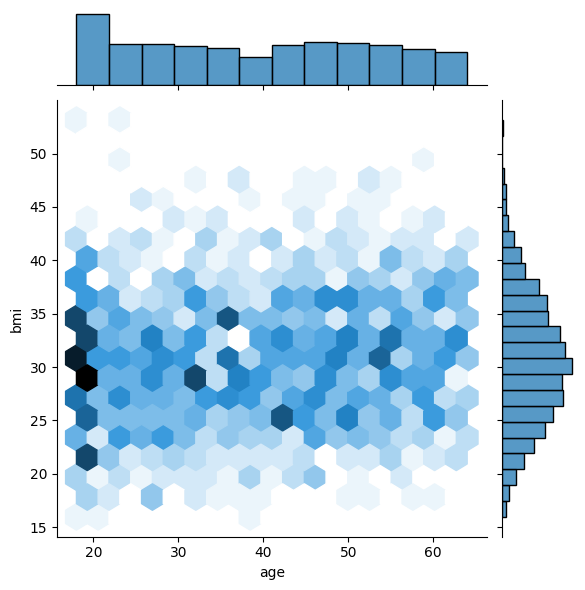

In [ ]:
sns.jointplot(data=data, x='age', y='bmi', kind='hex')
plt.show()

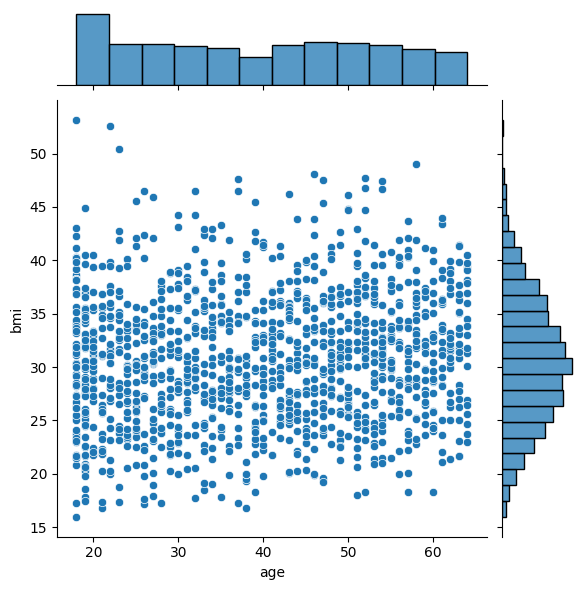

In [ ]:
sns.jointplot(data=data, x='age', y='bmi', kind='scatter')
plt.show()

Examine the relationship between “bmi” and “children”.

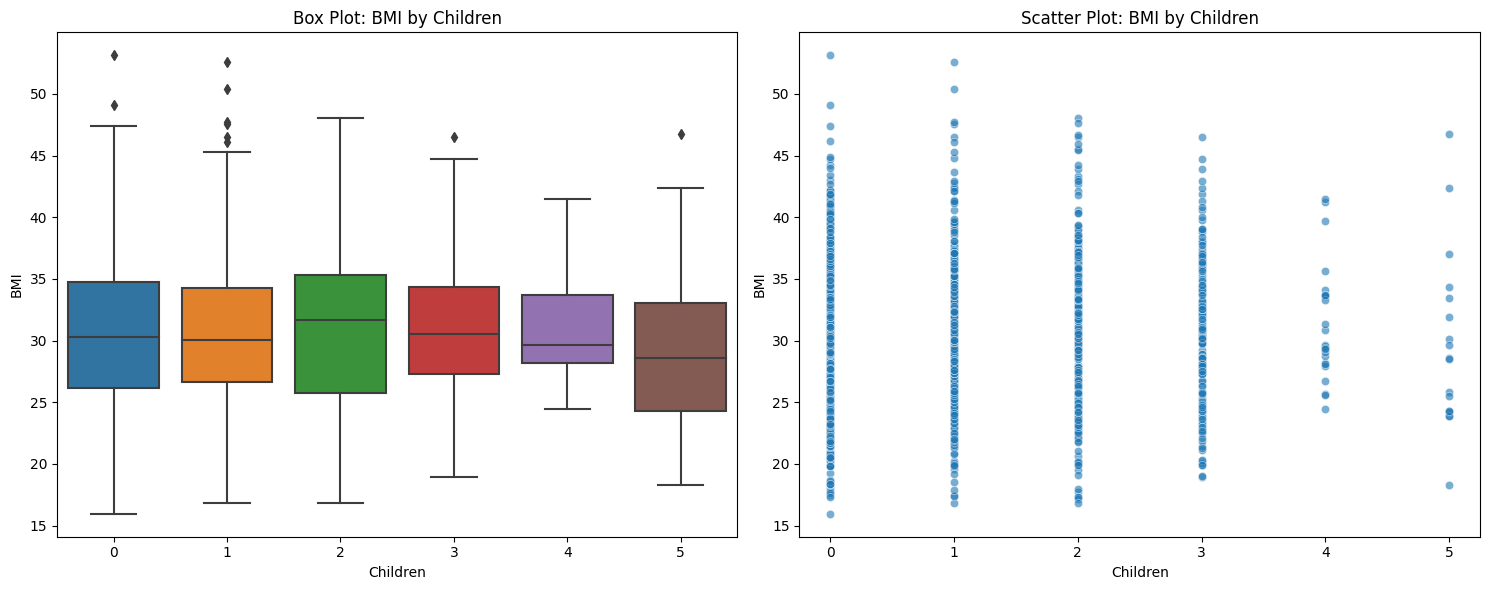

In [ ]:
plt.figure(figsize=(15, 6))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='children', y='bmi')
plt.title('Box Plot: BMI by Children')
plt.xlabel('Children')
plt.ylabel('BMI')

# Scatter plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='children', y='bmi', alpha=0.6)
plt.title('Scatter Plot: BMI by Children')
plt.xlabel('Children')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()

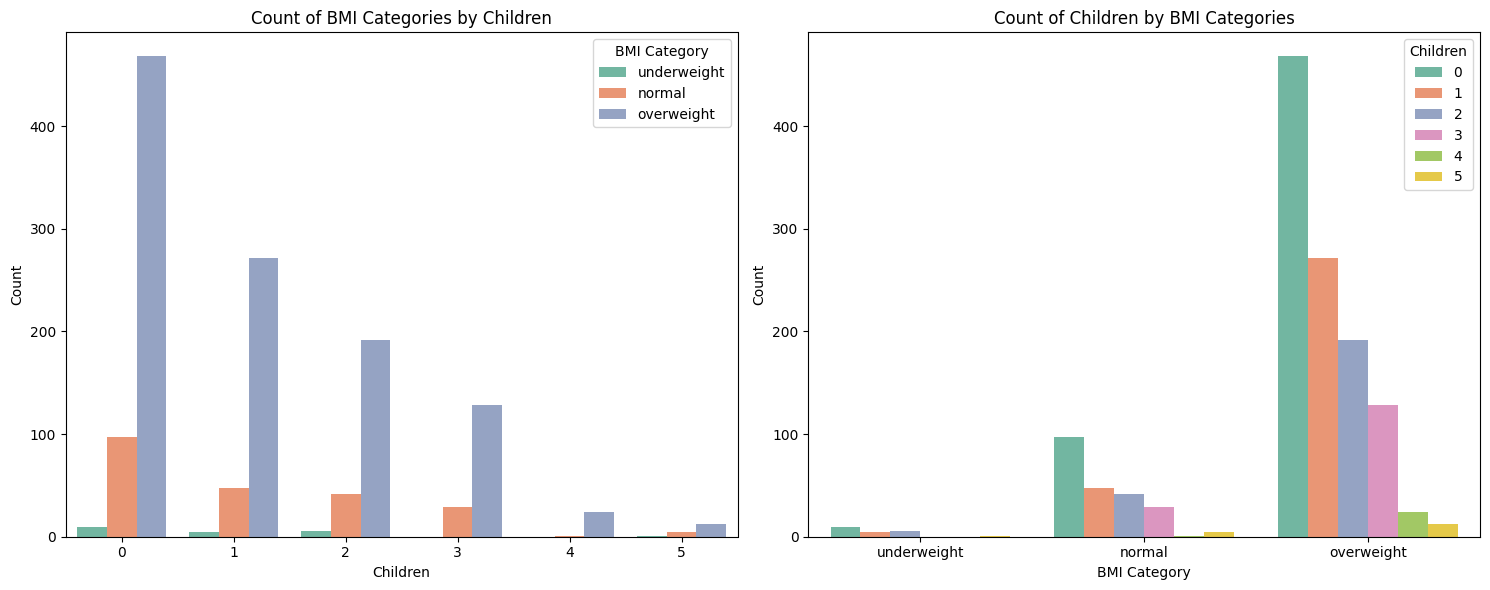

In [ ]:
# Categorize BMI values into categories
data['bmi_category'] = pd.cut(data['bmi'], bins=[0, 18.5, 24.9, 100], labels=['underweight', 'normal', 'overweight'])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# First
sns.countplot(data=data, x='children', hue='bmi_category', palette='Set2', ax=axes[0])
axes[0].set_title('Count of BMI Categories by Children')
axes[0].set_xlabel('Children')
axes[0].set_ylabel('Count')
axes[0].legend(title='BMI Category')

# Alternative
sns.countplot(data=data, x='bmi_category', hue='children', palette='Set2', ax=axes[1])
axes[1].set_title('Count of Children by BMI Categories')
axes[1].set_xlabel('BMI Category')
axes[1].set_ylabel('Count')
axes[1].legend(title='Children')

plt.tight_layout()
plt.show()

Is there an outlier in the "bmi" variable? Please review.


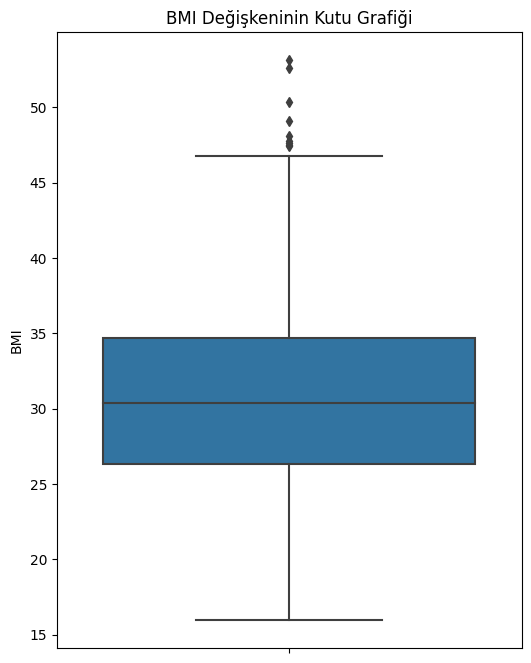

In [ ]:
# Boxplot for BMI
plt.figure(figsize=(6, 8))
sns.boxplot(data=data, y='bmi')
plt.title('BMI Değişkeninin Kutu Grafiği')
plt.ylabel('BMI')
plt.show()

In [ ]:
# Interquartile Range (IQR)
# aykırı değerler: Q1 - 1.5 * IQR ile Q3 + 1.5 * IQR

Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Sınırlar
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri kontrol
aykiri_degerler = data[(data['bmi'] < lower_bound) | (data['bmi'] > upper_bound)]
if len(aykiri_degerler) > 0:
    print("'BMI' değişkeninde aykırı değerler bulunuyor:")
    print(aykiri_degerler)
else:
    print("'BMI' değişkeninde aykırı değer bulunmuyor.")

'BMI' değişkeninde aykırı değerler bulunuyor:
      age     sex    bmi  children smoker     region      charges bmi_category
116    58    male  49.06         0     no  southeast  11381.32540   overweight
286    46  female  48.07         2     no  northeast   9432.92530   overweight
401    47    male  47.52         1     no  southeast   8083.91980   overweight
543    54  female  47.41         0    yes  southeast  63770.42801   overweight
847    23    male  50.38         1     no  southeast   2438.05520   overweight
860    37  female  47.60         2    yes  southwest  46113.51100   overweight
1047   22    male  52.58         1    yes  southeast  44501.39820   overweight
1088   52    male  47.74         1     no  southeast   9748.91060   overweight
1317   18    male  53.13         0     no  southeast   1163.46270   overweight



Examine the relationship between “bmi” and “charges”



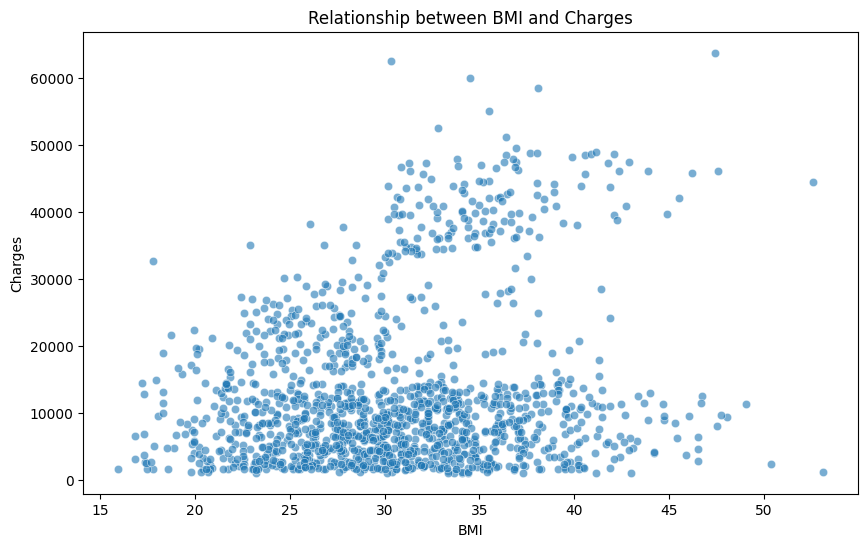

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='bmi', y='charges', alpha=0.6)
plt.title('Relationship between BMI and Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

<Figure size 1000x600 with 0 Axes>

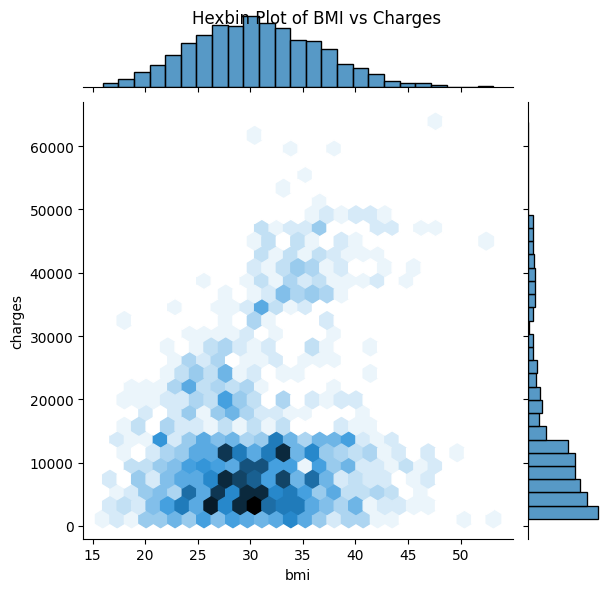

In [ ]:
plt.figure(figsize=(10, 6))
sns.jointplot(data=data, x='bmi', y='charges', kind='hex')
plt.suptitle('Hexbin Plot of BMI vs Charges')
plt.show()

Examine the relationship between “region”, “smoker” and “bmi” using bar plot.

<ipython-input-21-e94e61c789ec>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='region', y='bmi', hue='smoker', ci=None, palette='Paired')


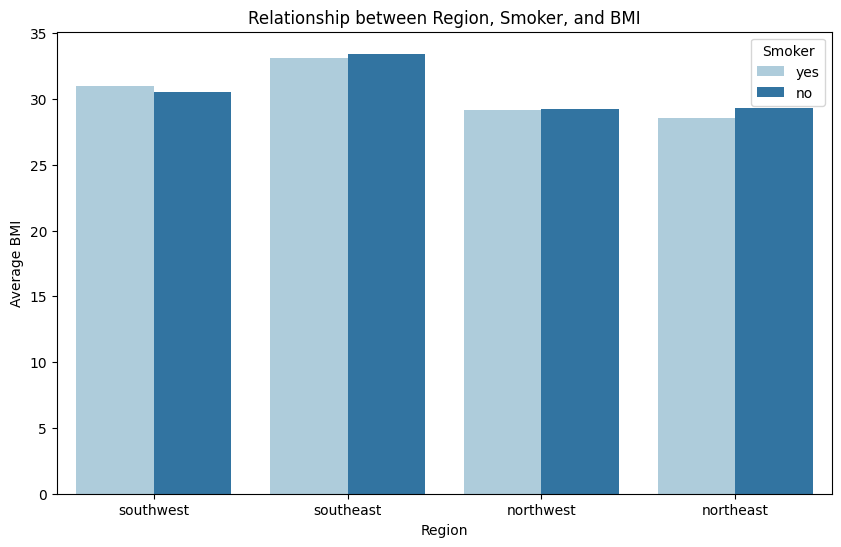

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='region', y='bmi', hue='smoker', ci=None, palette='Paired')
plt.title('Relationship between Region, Smoker, and BMI')
plt.xlabel('Region')
plt.ylabel('Average BMI')
plt.legend(title='Smoker', loc='upper right')
plt.show()

# **DATA PREPROCESSING**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   age           1338 non-null   int64   
 1   sex           1338 non-null   object  
 2   bmi           1338 non-null   float64 
 3   children      1338 non-null   int64   
 4   smoker        1338 non-null   object  
 5   region        1338 non-null   object  
 6   charges       1338 non-null   float64 
 7   bmi_category  1338 non-null   category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 74.7+ KB


In [ ]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
# For 'sex' column
from sklearn import preprocessing
le= preprocessing.LabelEncoder()

data['sex_encode']= le.fit_transform(data['sex'])

data.head()

,age,sex,bmi,children,smoker,region,charges,sex_encode
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [ ]:
# For 'smoker' column
from sklearn import preprocessing
le= preprocessing.LabelEncoder()

data['smoker_encode']= le.fit_transform(data['smoker'])

data.head()

,age,sex,bmi,children,smoker,region,charges,sex_encode,smoker_encode
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [ ]:
# The alternative method in the code snippet below has been used.
'''
# For 'region' column
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder()
encoded_features = oh_encoder.fit_transform(data[['region']])

encoded_df = pd.DataFrame(encoded_features.toarray(), columns=oh_encoder.get_feature_names_out(['region']))
data = pd.concat([data, encoded_df], axis=1)

data.head()
'''

,age,sex,bmi,children,smoker,region,charges,sex_encode,smoker_encode,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0.0,1.0,0.0,0.0


In [ ]:
# Alternative
region_dummies = pd.get_dummies(data['region'], prefix='region')
data = pd.concat([data, region_dummies], axis=1)

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges,sex_encode,smoker_encode,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,0,1,0,0


In [ ]:
data_prepared = data[['age','sex_encode','bmi','children','smoker_encode','region_northeast','region_northwest','region_southeast','region_southwest','charges']]

data_prepared.head()

,age,sex_encode,bmi,children,smoker_encode,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,0,27.900,0,1,0,0,0,1,16884.92400
1,18,1,33.770,1,0,0,0,1,0,1725.55230
2,28,1,33.000,3,0,0,0,1,0,4449.46200
3,33,1,22.705,0,0,0,1,0,0,21984.47061
4,32,1,28.880,0,0,0,1,0,0,3866.85520


In [37]:
import lightgbm
#Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor


Train-Test Split

In [ ]:
X = data_prepared.iloc[:, :-1]
Y = data_prepared['charges']


In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0:5]

array([[0.02173913, 0.        , 0.3212268 , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.47914985, 0.2       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.2173913 , 1.        , 0.45843422, 0.6       , 0.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.32608696, 1.        , 0.18146355, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ],
       [0.30434783, 1.        , 0.34759214, 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split( X, Y, test_size = 0.33, random_state = 0)

In [ ]:
X_train.shape

(896, 9)

In [ ]:
y_train.shape

(896,)

In [ ]:
X_test.shape

(442, 9)

In [ ]:
y_test.shape

(442,)

MODELS

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.966e+08, tolerance: 1.028e+07
  model = cd_fast.enet_coordinate_descent(


Linear Regression için En İyi Parametreler: {}
Ridge Regression için En İyi Parametreler: {'alpha': 0.1}
Lasso Regression için En İyi Parametreler: {'alpha': 1.0}
ElasticNet Regression için En İyi Parametreler: {'alpha': 0.01, 'l1_ratio': 0.9}
Decision Tree Regressor için En İyi Parametreler: {'max_depth': 10}
SVR için En İyi Parametreler: {'C': 10.0, 'kernel': 'linear'}
XGBoost Regressor için En İyi Parametreler: {'max_depth': 3, 'n_estimators': 100}
LGBM Regressor için En İyi Parametreler: {'max_depth': 3, 'n_estimators': 100}
Random Forest Regressor için En İyi Parametreler: {'max_depth': 10, 'n_estimators': 200}
Gradient Boosting Regressor için En İyi Parametreler: {'max_depth': 3, 'n_estimators': 100}
K-Nearest Neighbors Regressor için En İyi Parametreler: {'n_neighbors': 5}


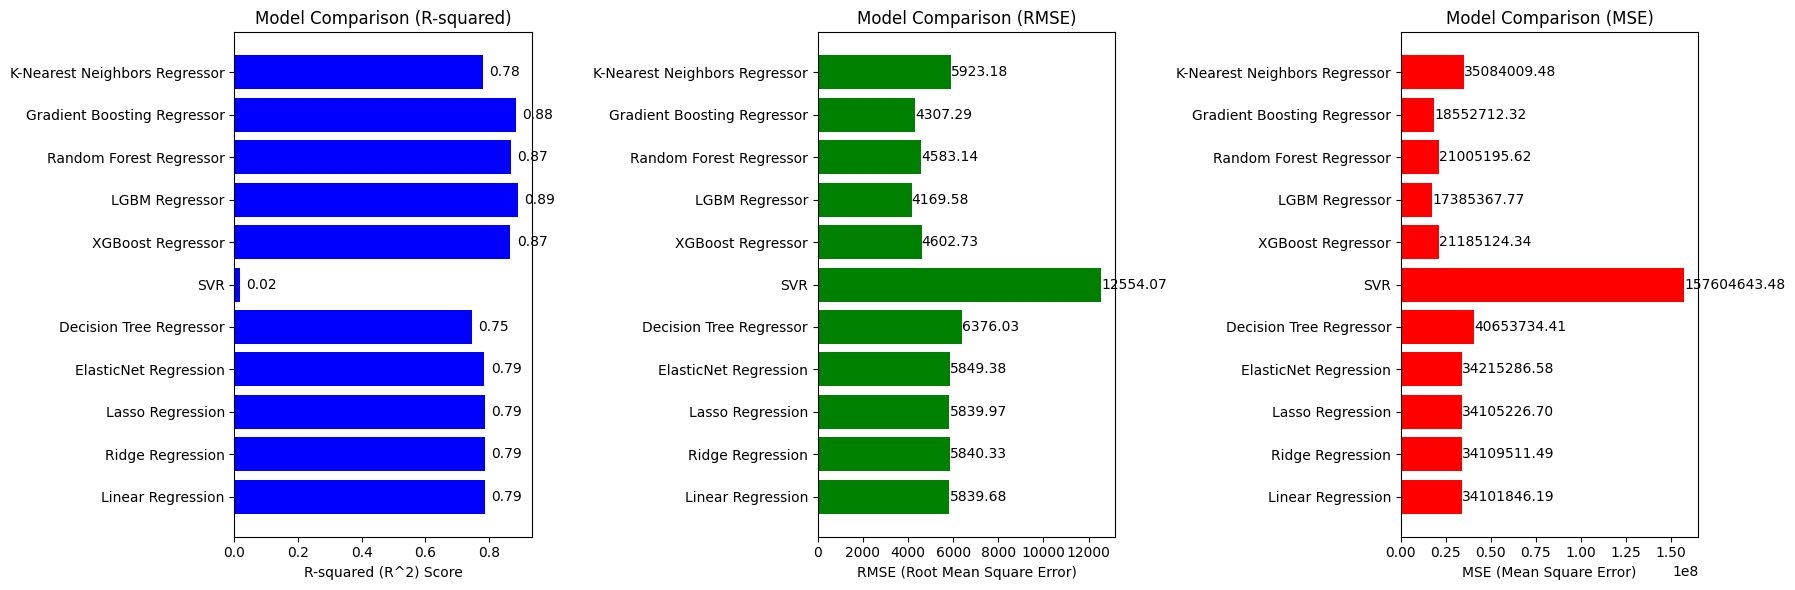

In [46]:
# Parameter ranges and best parameters for each regression model using GridSearchCV.
param_grids = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.01, 0.1, 1.0]},
    'Lasso Regression': {'alpha': [0.01, 0.1, 1.0]},
    'ElasticNet Regression': {'alpha': [0.01, 0.1, 1.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    'Decision Tree Regressor': {'max_depth': [None, 10, 20, 30]},
    'SVR': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1.0, 10.0]},
    'XGBoost Regressor': {'n_estimators': [100, 200], 'max_depth': [3, 5, 7]},
    'LGBM Regressor': {'n_estimators': [100, 200], 'max_depth': [3, 5, 7]},
    'Random Forest Regressor': {'n_estimators': [100, 200], 'max_depth': [None, 10, 20, 30]},
    'Gradient Boosting Regressor': {'n_estimators': [100, 200], 'max_depth': [3, 5, 7]},
    'K-Nearest Neighbors Regressor': {'n_neighbors': [3, 5, 7]},
}

best_params = {}  # An empty dictionary to store the best parameters of each algorithm


# Empty lists to store models and results
models = []
r2_scores = []
rmse_scores = []
mse_scores = []

# Training of models and calculation of scores
for model_name, param_grid in param_grids.items():
    model = None
    if model_name == 'Linear Regression':
        model = LinearRegression()
    elif model_name == 'Ridge Regression':
        model = Ridge()
    elif model_name == 'Lasso Regression':
        model = Lasso()
    elif model_name == 'ElasticNet Regression':
        model = ElasticNet()
    elif model_name == 'Decision Tree Regressor':
        model = DecisionTreeRegressor()
    elif model_name == 'SVR':
        model = SVR()
    elif model_name == 'XGBoost Regressor':
        model = XGBRegressor()
    elif model_name == 'LGBM Regressor':
        model = LGBMRegressor(verbosity= -1)
    elif model_name == 'Random Forest Regressor':
        model = RandomForestRegressor()
    elif model_name == 'Gradient Boosting Regressor':
        model = GradientBoostingRegressor()
    elif model_name == 'K-Nearest Neighbors Regressor':
        model = KNeighborsRegressor()

    # Finding the best hyperparameters using GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    # Choosing the best model
    best_model = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_  # En iyi parametreleri sakla

    # Fit the model
    best_model.fit(X_train, y_train)

    # Prediction
    y_pred = best_model.predict(X_test)

    # R-squared (R^2) score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # RMSE (Root Mean Square Error)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

    # MSE (Mean Square Error)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Show the best parameters
for model_name, params in best_params.items():
    print(f'{model_name} için En İyi Parametreler: {params}')

# Compare results
model_names = list(param_grids.keys())

fig, axes = plt.subplots(ncols=3, figsize=(18, 6))

bars = axes[0].barh(model_names, r2_scores, color='b')
axes[0].set_xlabel('R-squared (R^2) Score')
axes[0].set_title('Model Comparison (R-squared)')
for bar, r2 in zip(bars, r2_scores):
    axes[0].text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{r2:.2f}', va='center')

bars = axes[1].barh(model_names, rmse_scores, color='g')
axes[1].set_xlabel('RMSE (Root Mean Square Error)')
axes[1].set_title('Model Comparison (RMSE)')
for bar, rmse in zip(bars, rmse_scores):
    axes[1].text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{rmse:.2f}', va='center')

bars = axes[2].barh(model_names, mse_scores, color='r')
axes[2].set_xlabel('MSE (Mean Square Error)')
axes[2].set_title('Model Comparison (MSE)')
for bar, mse in zip(bars, mse_scores):
    axes[2].text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{mse:.2f}', va='center')

plt.tight_layout()
plt.show()


SVR Model Optimization

In [ ]:
# SVR parameters
param_grid = {
    'C': [0.1, 1.0, 10.0, 50.0, 100.0, 150.0, 500.0],
    'kernel': ['linear', 'rbf', 'poly']
}

# SVR model
svr = SVR()

# Finding the best parameters with GridSearchCV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Finding the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model
best_model.fit(X_train, y_train)

# Prediction
y_pred = best_model.predict(X_test)

# Results scores
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))



print("En İyi Parametreler:", best_params)
print("MSE:", mse)
print("R^2:", r2)
print("RMSE", rmse )

En İyi Parametreler: {'C': 500.0, 'kernel': 'poly'}
MSE: 29117346.799814064
R^2: 0.8181943590356513
RMSE 5396.049184339786


SVR Model Optimization-2

In [ ]:
param_grid = {
    'C': [50.0, 100.0, 150.0, 500.0, 700.0, 900.0, 1000.0, 1500.0, 1750.0, 2000.0, 5000.0, 10000.0 ],
    'kernel': ['linear', 'rbf', 'poly']
}

svr = SVR()
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("En İyi Parametreler:", best_params)
print("MSE:", mse)
print("R^2:", r2)
print("RMSE", rmse )

En İyi Parametreler: {'C': 5000.0, 'kernel': 'poly'}
MSE: 22498352.311530184
R^2: 0.8595226621861851
RMSE 4743.242805458117


Without SVR

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.966e+08, tolerance: 1.028e+07
  model = cd_fast.enet_coordinate_descent(


Linear Regression için En İyi Parametreler: {}
Ridge Regression için En İyi Parametreler: {'alpha': 0.1}
Lasso Regression için En İyi Parametreler: {'alpha': 1.0}
ElasticNet Regression için En İyi Parametreler: {'alpha': 0.01, 'l1_ratio': 0.9}
Decision Tree Regressor için En İyi Parametreler: {'max_depth': 5}
XGBoost Regressor için En İyi Parametreler: {'max_depth': 3, 'n_estimators': 100}
LGBM Regressor için En İyi Parametreler: {'max_depth': 3, 'n_estimators': 50}
Random Forest Regressor için En İyi Parametreler: {'max_depth': 5, 'n_estimators': 100}
Gradient Boosting Regressor için En İyi Parametreler: {'max_depth': 3, 'n_estimators': 50}
K-Nearest Neighbors Regressor için En İyi Parametreler: {'n_neighbors': 5}


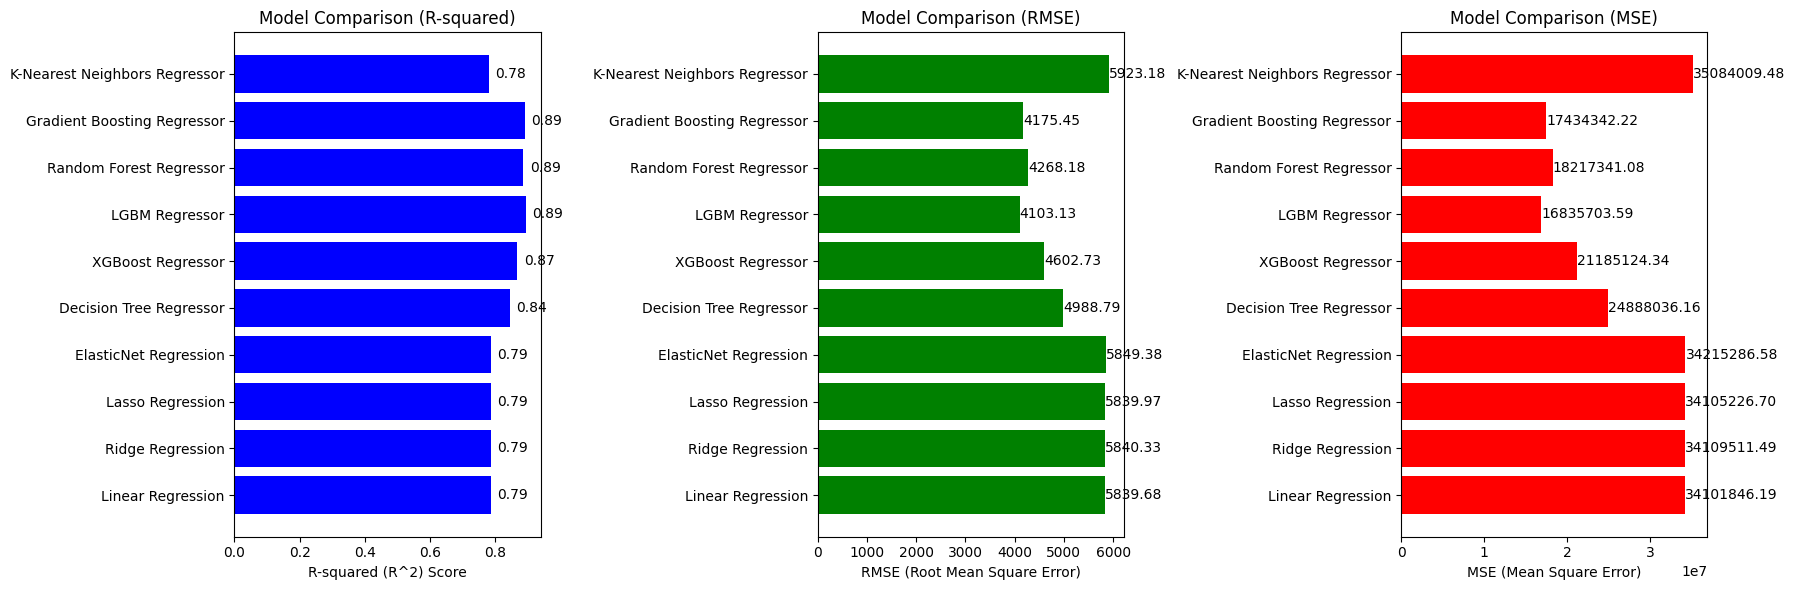

In [47]:
param_grids = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.01, 0.1, 1.0]},
    'Lasso Regression': {'alpha': [0.01, 0.1, 1.0]},
    'ElasticNet Regression': {'alpha': [0.01, 0.1, 1.0], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
    'Decision Tree Regressor': {'max_depth': [None, 5, 10, 15]},
    'XGBoost Regressor': {'n_estimators': [100, 200], 'max_depth': [1, 3, 5, 7, 9]},
    'LGBM Regressor': {'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 5, 7]},
    'Random Forest Regressor': {'n_estimators': [100, 150, 200, 250], 'max_depth': [None, 5, 10, 15, 20]},
    'Gradient Boosting Regressor': {'n_estimators': [50, 100, 150, 200], 'max_depth': [1, 3, 5, 7]},
    'K-Nearest Neighbors Regressor': {'n_neighbors': [1, 3, 5, 7, 9]},
}

best_params = {}
models = []
r2_scores = []
rmse_scores = []
mse_scores = []

for model_name, param_grid in param_grids.items():
    model = None
    if model_name == 'Linear Regression':
        model = LinearRegression()
    elif model_name == 'Ridge Regression':
        model = Ridge()
    elif model_name == 'Lasso Regression':
        model = Lasso()
    elif model_name == 'ElasticNet Regression':
        model = ElasticNet()
    elif model_name == 'Decision Tree Regressor':
        model = DecisionTreeRegressor()
    elif model_name == 'XGBoost Regressor':
        model = XGBRegressor()
    elif model_name == 'LGBM Regressor':
        model = LGBMRegressor(verbosity= -1)
    elif model_name == 'Random Forest Regressor':
        model = RandomForestRegressor()
    elif model_name == 'Gradient Boosting Regressor':
        model = GradientBoostingRegressor()
    elif model_name == 'K-Nearest Neighbors Regressor':
        model = KNeighborsRegressor()


    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    # R-squared (R^2)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # RMSE (Root Mean Square Error)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

    # MSE (Mean Square Error)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# En iyi parametreleri gösterme
for model_name, params in best_params.items():
    print(f'{model_name} için En İyi Parametreler: {params}')

model_names = list(param_grids.keys())

fig, axes = plt.subplots(ncols=3, figsize=(18, 6))

bars = axes[0].barh(model_names, r2_scores, color='b')
axes[0].set_xlabel('R-squared (R^2) Score')
axes[0].set_title('Model Comparison (R-squared)')
for bar, r2 in zip(bars, r2_scores):
    axes[0].text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{r2:.2f}', va='center')

bars = axes[1].barh(model_names, rmse_scores, color='g')
axes[1].set_xlabel('RMSE (Root Mean Square Error)')
axes[1].set_title('Model Comparison (RMSE)')
for bar, rmse in zip(bars, rmse_scores):
    axes[1].text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{rmse:.2f}', va='center')

bars = axes[2].barh(model_names, mse_scores, color='r')
axes[2].set_xlabel('MSE (Mean Square Error)')
axes[2].set_title('Model Comparison (MSE)')
for bar, mse in zip(bars, mse_scores):
    axes[2].text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{mse:.2f}', va='center')

plt.tight_layout()
plt.show();


**BEST MODELS**

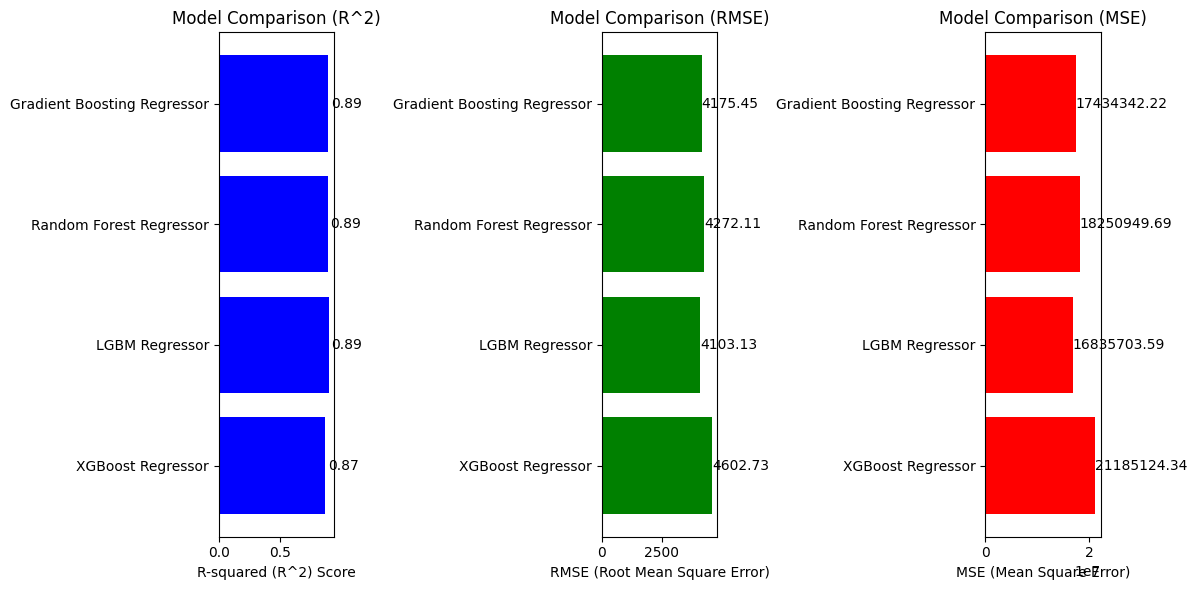

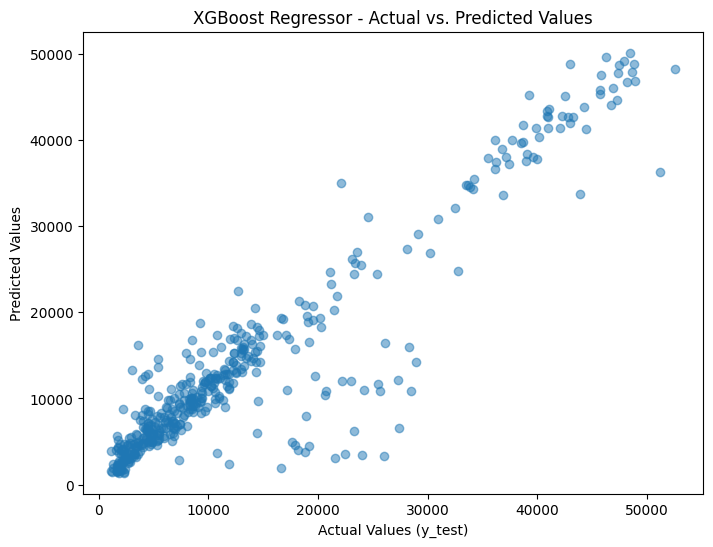

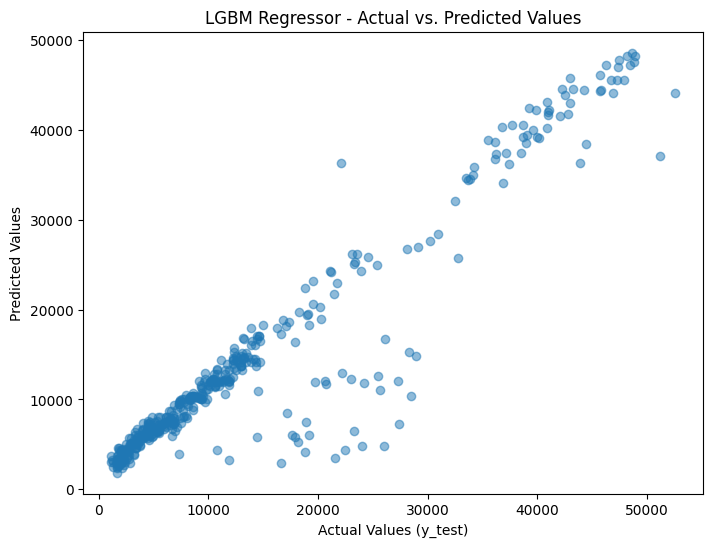

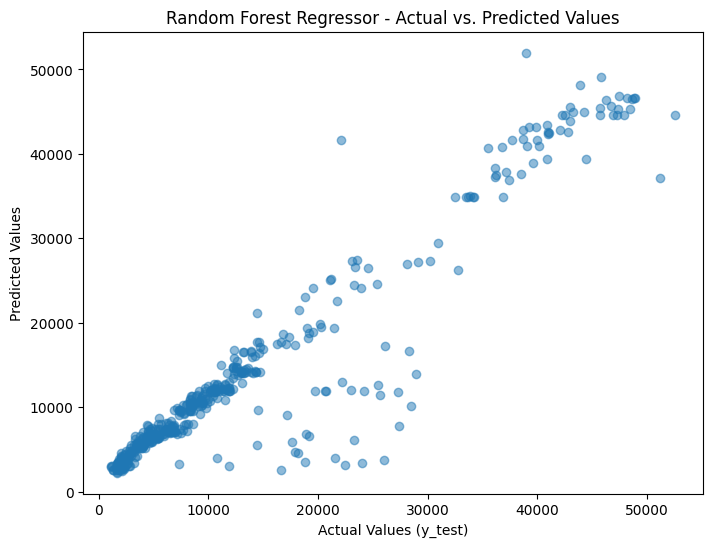

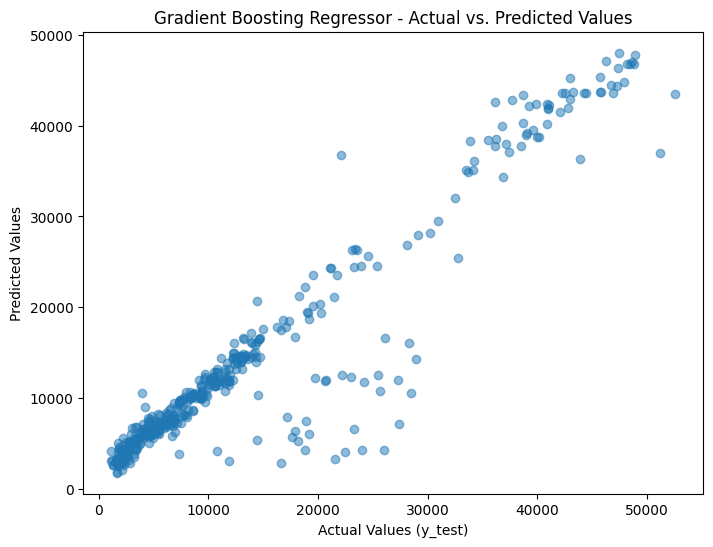

Tahminler ve Gerçek Değerler:
           Actual  XGBoost Regressor  LGBM Regressor  Random Forest Regressor  \
578    9724.53000       11938.824219    12896.738863             12321.763476   
610    8547.69130        9440.822266    10404.728266             10609.461368   
569   45702.02235       45746.289062    46104.109585             45397.938511   
1034  12950.07120       15817.152344    13767.976804             14067.676783   
198    9644.25250        8486.946289     9737.366457             10995.832322   
...           ...                ...             ...                      ...   
117   19107.77960       18887.132812    19467.265645             18159.858311   
520   25656.57526       10835.829102    11007.829790             11468.751606   
422   39125.33225       38338.035156    39384.988086             40861.051484   
294    3906.12700       12275.467773     5914.133483              5110.442509   
261   17085.26760       17393.298828    18174.903079             17448.623984  

In [48]:
# XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, max_depth=3)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# LGBM Regressor
lgbm_model = LGBMRegressor(n_estimators=50, max_depth=3, verbosity= -1)
lgbm_model.fit(X_train, y_train)
lgbm_predictions = lgbm_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=200, max_depth=5)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=3)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Creating a DataFrame with predictions and actual values
results_df = pd.DataFrame({'Actual': y_test,
                            'XGBoost Regressor': xgb_predictions,
                            'LGBM Regressor': lgbm_predictions,
                            'Random Forest Regressor': rf_predictions,
                            'Gradient Boosting Regressor': gb_predictions})

# R^2, RMSE ve MSE scores
def calculate_scores(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mse = mean_squared_error(y_true, y_pred)
    return r2, rmse, mse

r2_xgb, rmse_xgb, mse_xgb = calculate_scores(y_test, xgb_predictions)
r2_lgbm, rmse_lgbm, mse_lgbm = calculate_scores(y_test, lgbm_predictions)
r2_rf, rmse_rf, mse_rf = calculate_scores(y_test, rf_predictions)
r2_gb, rmse_gb, mse_gb = calculate_scores(y_test, gb_predictions)

# Scores dataframe
scores_df = pd.DataFrame({'Model': ['XGBoost Regressor', 'LGBM Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
                          'R^2': [r2_xgb, r2_lgbm, r2_rf, r2_gb],
                          'RMSE': [rmse_xgb, rmse_lgbm, rmse_rf, rmse_gb],
                          'MSE': [mse_xgb, mse_lgbm, mse_rf, mse_gb]})


plt.figure(figsize=(12, 6))
plt.subplot(131)
bars = plt.barh(scores_df['Model'], scores_df['R^2'], color='b')
plt.xlabel('R-squared (R^2) Score')
plt.title('Model Comparison (R^2)')
for bar, r2 in zip(bars, scores_df['R^2']):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{r2:.2f}', va='center')

plt.subplot(132)
bars = plt.barh(scores_df['Model'], scores_df['RMSE'], color='g')
plt.xlabel('RMSE (Root Mean Square Error)')
plt.title('Model Comparison (RMSE)')
for bar, rmse in zip(bars, scores_df['RMSE']):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{rmse:.2f}', va='center')

plt.subplot(133)
bars = plt.barh(scores_df['Model'], scores_df['MSE'], color='r')
plt.xlabel('MSE (Mean Square Error)')
plt.title('Model Comparison (MSE)')
for bar, mse in zip(bars, scores_df['MSE']):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{mse:.2f}', va='center')

plt.tight_layout()
plt.show()

# Plot the y_test and y_predict scatter plots for each model
for model_name in results_df.columns[1:]:
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, results_df[model_name], alpha=0.5)
    plt.xlabel('Actual Values (y_test)')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - Actual vs. Predicted Values')
    plt.show()

print("Tahminler ve Gerçek Değerler:")
print(results_df)
print("\nSkorlar:")
print(scores_df);